# Objective: Artificial Neural Network Regression for Trigonometry Functions
Here, I'm going to build an aritifical neural network regression model using PyTorch to recreate a combination of trigonometric functions. To do this, we are creating a synthetic data set.

## Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Create Data
This covers how we can synthetically create data from a combination of trigonometric functions.

In [2]:
# create dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3        # X will create a plane [-3, +3) X [-3, +3)
y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

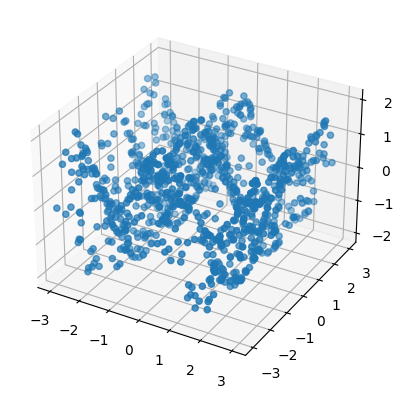

In [3]:
# plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

## Preprocess Data
This covers how to prepare data for training.

In [18]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))

torch.Size([1000, 2])

## Build Model
This covers how to build a artificial neural network regression model using the synthetic data from trigonometric functions.

In [5]:
# build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [6]:
# loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Training
This covers how to train the artificial neural network regression model with the input data that we created.

In [7]:
# train policy in a function
def gradient_descent(model, criterion, optimizer, X_train, y_train, epochs=1000):
    # create a container to store losses
    train_losses = np.zeros(epochs)
    
    # training
    for epoch in range(epochs):
        # zero the parameter gradients to make sure they are zero
        optimizer.zero_grad()
        
        # forward pass
        outputs = model(X_train)
        loss = criterion(y_train, outputs)
        
        # backward and optimize
        loss.backward()
        optimizer.step()
        
        # save losses
        train_losses[epoch] = loss.item()
        
        # print out the training progress
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}")
    
    return train_losses

In [8]:
# actual training
train_losses = gradient_descent(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.6495
Epoch 100/1000, Train Loss: 0.2608
Epoch 150/1000, Train Loss: 0.1256
Epoch 200/1000, Train Loss: 0.0471
Epoch 250/1000, Train Loss: 0.0216
Epoch 300/1000, Train Loss: 0.0081
Epoch 350/1000, Train Loss: 0.0076
Epoch 400/1000, Train Loss: 0.0044
Epoch 450/1000, Train Loss: 0.0039
Epoch 500/1000, Train Loss: 0.0046
Epoch 550/1000, Train Loss: 0.0034
Epoch 600/1000, Train Loss: 0.0030
Epoch 650/1000, Train Loss: 0.0029
Epoch 700/1000, Train Loss: 0.0030
Epoch 750/1000, Train Loss: 0.0026
Epoch 800/1000, Train Loss: 0.0041
Epoch 850/1000, Train Loss: 0.0025
Epoch 900/1000, Train Loss: 0.0079
Epoch 950/1000, Train Loss: 0.0025
Epoch 1000/1000, Train Loss: 0.0023


## Result
This shows the result of the artificial neural network regression model by showing the loss evolution. Then we can make predictions out of the trained model and display on a plot.

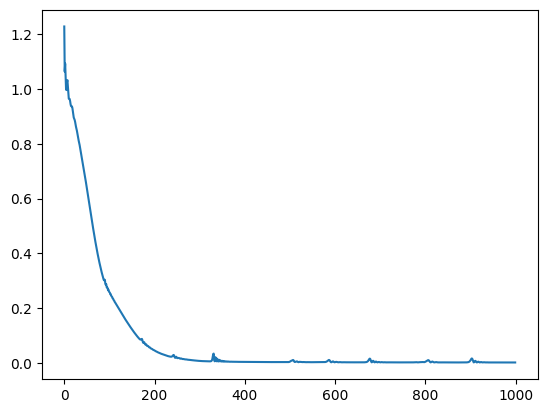

In [9]:
# plot the losses
plt.plot(train_losses)

## Recreate Plot
This covers how to recreate the plot made out of the result from our trained model.

In [19]:
# create meshgrid between -3 and 3
line = np.linspace(-3, 3, 50)
x1, x2 = np.meshgrid(line, line)

In [25]:
# process x1 and x2 to have the correct format for the model
x_grid = np.vstack((x1.flatten(), x2.flatten())).T

# convert data from numpy to torch
x_grid_torch = torch.from_numpy(x_grid.astype(np.float32))

In [39]:
# generate outputs from the model
y_hat_torch = model(x_grid_torch)

# convert the outputs from torch to numpy
y_hat = y_hat_torch.detach().numpy().flatten()

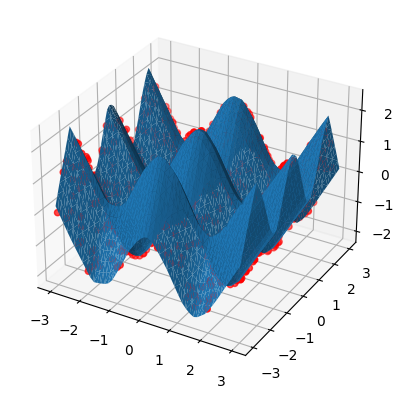

In [45]:
# plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], y, c='r')        # synthesized data
ax.plot_trisurf(x_grid[:, 0], x_grid[:, 1], y_hat, linewidth=0.2, antialiased=True)     
plt.show()